## Email campaign performance

<h3>Overview</h3>

The company <b>ArmadaArtisan</b> has been trying out several different versions of a welcome email for new trial signups. The team hasn’t really looked at the data much and would like to have an understanding of how their past emails have performed. 

Here's where I come in!

<hr>

<a id='top'></a>
<h3>Table of contents</h3>

- <a href='#load'>Load the data and libraries</a>
- <a href='#inspect'>Inspect and clean data</a>
- <a href='#funnel'>Campaign funnel analysis</a>
- <a href='#metrics'>Other performance metrics</a>
- <a href='#summary'>Summary</a>

<hr>

<a id='load'></a>
<h3>Load the data and libraries needed</h3>

For this analysis, I'm importing some standard Python libraries for data analysis. In addition, I'm using matpotlib for data visualization with some very light support from the `seaborn` library.

I'm gathering data from the following datasets, which contain the following information:

- <b>customer_signups</b>: provides a list of customers who have signed up since we’ve been running these email experiments, along with the timestamp of their signup.
- <b>email_actions</b>: Log of actions having to do with the emails we've sent.
- <b>trial_conversions</b>: is a list of customers who converted at the end of their trial periods.

In [31]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from functools import reduce

# Initialize the figure
plt.style.use('seaborn-darkgrid')

# read each csv file into a dataframe
customers = pd.read_csv('customer_signups.csv')
emails = pd.read_csv('email_actions.csv')
conversions = pd.read_csv('trial_conversions.csv')

In [32]:
# create list of dataframes to iterate over
dataframes = [customers, emails, conversions]

# create list of dataframe names as string values
df_names = ['customers', 'emails', 'conversions']

# print the shape of each dataframe
for idx, df in enumerate(dataframes):
    print('shape of {} dataframe: {}'.format(df_names[idx], df.shape))

shape of customers dataframe: (1880, 3)
shape of emails dataframe: (2714, 5)
shape of conversions dataframe: (379, 2)


In [33]:
# describe the customers dataset.
customers.describe(include='all').fillna('--')

# 1880 distinct customer sign-ups during the time the company experimented with email campaigns

,customer_id,customer_signup_datetime,customer_signup_unix_timestamp
count,1880,1880,1880
unique,1880,1880,--
top,e0ed494c-41b3-4f56-b388-e4ed62665b95,2018-11-09 23:37:47,--
freq,1,1,--
mean,--,--,1.5431e+09
std,--,--,7.17328e+06
min,--,--,1.53042e+09
25%,--,--,1.53695e+09
50%,--,--,1.5434e+09
75%,--,--,1.54921e+09


In [34]:
# describe the entire emails dataset
emails.describe(include='all').fillna('-')

,customer_id,datetime,unix_timestamp,email_campaign,action
count,2714,2714,2714,2714,2714
unique,1880,2694,-,6,3
top,2903d46f-cf89-49f5-a4e7-865aa4a44997,2019-04-11 03:00:00,-,campaign_6,send
freq,3,2,-,637,1880
mean,-,-,1.54331e+09,-,-
std,-,-,7.10372e+06,-,-
min,-,-,1.53042e+09,-,-
25%,-,-,1.53723e+09,-,-
50%,-,-,1.54376e+09,-,-
75%,-,-,1.54935e+09,-,-


In [35]:
# describe the entire conversions dataset
conversions.describe(include='all').fillna('-')

,customer_id,number_of_licenses_at_conversion
count,379,379
unique,379,-
top,e0ed494c-41b3-4f56-b388-e4ed62665b95,-
freq,1,-
mean,-,18.7573
std,-,8.76496
min,-,11
25%,-,15
50%,-,17
75%,-,21


<a href='#top'>Back to top</a>

<hr>

<a id='clean'></a>
<h3>Inspect and clean the data</h3>

After getting a basic understanding of the data, I began joining the tables together to get a better sense of campaign performance and actions completed by individual customers.

I began by asking a few questions about the data. These questions are listed in bold with the answer beneath it before each cell block in which I answer my question.

<b>Do all customers who signup for a free trial get an email sent to them?</b>

I filtered the `emails` dataframe by the action `send` and joined it to the `customers` dataframe. It appears that each customer gets an email sent to them when they sign up for a trial.

In [36]:
# merge customers dataframe to emails where action is filtered on send

customers.merge(emails[emails['action'] == 'send']).describe(include='all').fillna('-')

,customer_id,customer_signup_datetime,customer_signup_unix_timestamp,datetime,unix_timestamp,email_campaign,action
count,1880,1880,1880,1880,1880,1880,1880
unique,1880,1880,-,1860,-,6,1
top,e0ed494c-41b3-4f56-b388-e4ed62665b95,2018-11-09 23:37:47,-,2019-01-26 17:30:00,-,campaign_5,send
freq,1,1,-,2,-,416,1880
mean,-,-,1.5431e+09,-,1.5431e+09,-,-
std,-,-,7.17328e+06,-,7.17322e+06,-,-
min,-,-,1.53042e+09,-,1.53042e+09,-,-
25%,-,-,1.53695e+09,-,1.53695e+09,-,-
50%,-,-,1.5434e+09,-,1.5434e+09,-,-
75%,-,-,1.54921e+09,-,1.54921e+09,-,-


<b>Do all of the emails get sent <i>after</i> the customer signs up?</b>

It turns out that there are about ~200 emails that were actually sent to customers before they actually signed up for the free trial. This seems fishy. When I checked to see the time difference between the time the email was sent and their signup times, there were a few anomolies. 

75% of the data has a max difference (email sent before customer signed up for free trial) of .8 minutes whereas the max number is over 1,000 minutes. I'm imagining this is due to some issue with data collection. After further inspection, it appears that the outliers arrive from the fact that the action's `datetime` doesn't actually have a timestamp appended to it. I filtered this data out and discovered that the average difference for emails that were sent before customers actually signed up for the trial was only ~30 seconds (~.46 minutes). 

As a result, I'm going to assume that this was simply due to error and that in order to actually receive an email (and consequently click on any links in the email), you must first sign up for a free trial.

In [37]:
# filter the dataframe as tos for 'time of sends'
tos = customers.merge(emails[emails['action'] == 'send'])

# create the boolean filter
mask = tos['customer_signup_datetime'] >= tos['datetime']

# filter dataset and check shape
tos[mask].shape

(196, 7)

In [38]:
# convert datetime columns from string types to datetime objects
tos['customer_signup_datetime'] = pd.to_datetime(tos['customer_signup_datetime'])

# same for datetime
tos['datetime'] = pd.to_datetime(tos['datetime'])

# check the average difference 
tos['diff'] = (tos[mask]['customer_signup_datetime'] - tos[mask]['datetime'])

# turn the timedelta difference into seconds, then minutes
tos['diff_minutes'] = tos[mask]['diff'].apply(lambda row: row.total_seconds() / 60.0)

# describe the spread of the variable
tos['diff_minutes'].describe()

count     196.000000
mean      110.362330
std       382.730097
min         0.000000
25%         0.183333
50%         0.525000
75%         0.800000
max      1439.916667
Name: diff_minutes, dtype: float64

In [39]:
tos[tos['diff_minutes'] > .80].count()[0]

44

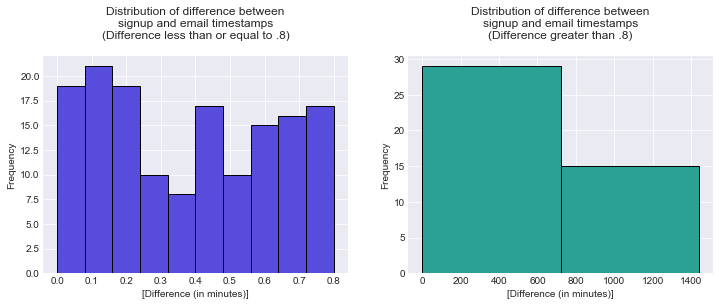

In [40]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
tos[tos['diff_minutes'] <= .8]['diff_minutes'].plot.hist(color='#584cdcff', edgecolor='black')
plt.title('Distribution of difference between\nsignup and email timestamps\n(Difference less than or equal to .8)\n')
plt.xlabel('[Difference (in minutes)]')

ax = fig.add_subplot(1,2,2)
tos[tos['diff_minutes'] > .8]['diff_minutes'].plot.hist(color='#2BA195', edgecolor='black', bins=2)
plt.title('Distribution of difference between\nsignup and email timestamps\n(Difference greater than .8)\n')
plt.xlabel('[Difference (in minutes)]')
plt.show()

In [41]:
print('{} minutes'.format(round(np.mean(tos[tos['diff_minutes'] < 1000]['diff_minutes']), 2)))

0.46 minutes


<a href='#top'>Back to top</a>

<hr>

<a id='funnel'></a>

<h3>Campaign funnel</h3>

I'm making the assumption that signups have to happen before we can send them a welcome email. Therefore, the only logical flow of actions in the `emails` dataframe is as followed:

    Signup > Send > Open > Click
    
The conversion, however, can happen at any point throughout the campaign funnel and isn't contingent on any the `open` or `click` actions.

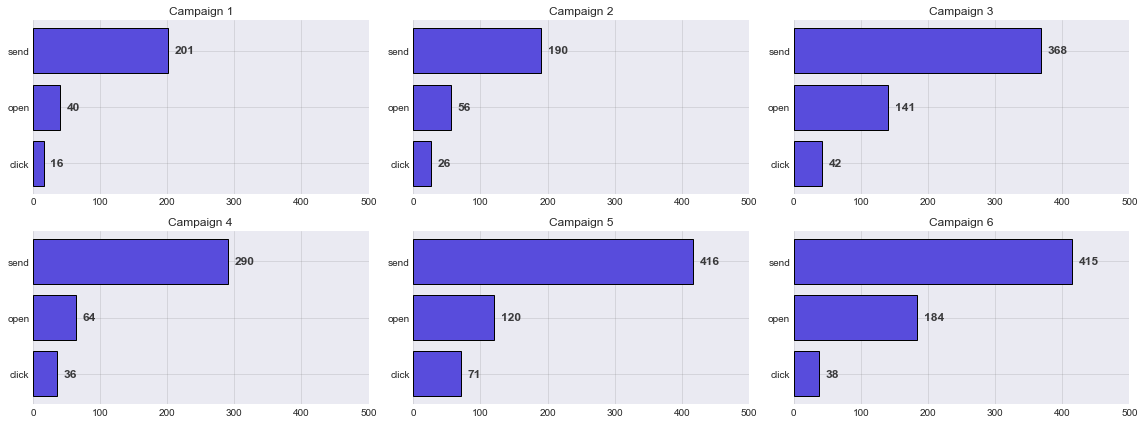

In [42]:
# create figure object to plot graphs on
fig = plt.figure(figsize=(16,6))

# create list of campaign names
campaigns = ['campaign_{}'.format(i) for i in range(1,7)]

# iterate and plot each campaign funnel analysis
for idx, campaign in enumerate(campaigns):
    ax = fig.add_subplot(2,3, idx + 1)
    filtered_df = (emails[emails['email_campaign'] == campaign]
                   .groupby('action')
                   .size()
                   .reset_index(name='count')
                  )
    ax.barh(filtered_df['action'].values, 
            filtered_df['count'].values,
            color='#584cdcff', 
            edgecolor='black')
    ax.set_xlim(0, 500)
    ax.set_title('{}'.format(campaign.replace('_', ' ').title()))
    ax.grid('--', color='gray', alpha=.25)
    plt.tight_layout()
    
    for idx, value in enumerate(filtered_df['count'].values):
        plt.text(value + 10, 
                 idx - .05, 
                 format(int(value),','), 
                 color='black',
                 alpha=0.75,
                 weight='bold',
                 fontsize=12)

In [43]:
# group the emails dataframe by unique customer_id and see the path of their actions based on datetime
path_df = (emails
            .sort_values(by='datetime', ascending=True)
            .groupby('customer_id')['action']
            .apply(list)
            .reset_index(name='path')
          )

path_df['path'] = path_df['path'].str.join(' > ')

In [44]:
# what is the distribution of unique paths?
path_df['path'].value_counts()

send                   1275
send > open             307
send > open > click     144
open > send              69
send > click > open      47
open > send > click      27
open > click > send       4
click > open > send       4
click > send > open       3
Name: path, dtype: int64

In [45]:
def update_paths(row):
    if row == 'open > send':
        return 'send > open'
    elif row.count('>') == 2:
        if row != 'send > open > click':
            return 'send > open > click'
        else:
            return row
    else:
        return row

# update bad paths
path_df['updated_path'] = path_df['path'].apply(update_paths)

# check out the paths again
path_df['updated_path'].value_counts()

send                   1275
send > open             376
send > open > click     229
Name: updated_path, dtype: int64

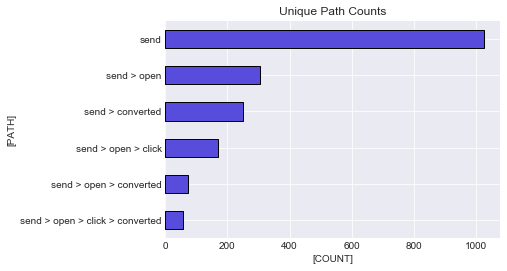

In [46]:
# path_df to conversions df and fill missing values with zeroes
merged_df = path_df.merge(conversions, how='left').fillna(0)

# update the updated_path variable with '> converted' if the number of licenses_at_conversion isn't zero.
merged_df['updated_path'] = np.where(merged_df['number_of_licenses_at_conversion'] != 0,
                                     merged_df['updated_path'] + ' > converted',
                                     merged_df['updated_path'])

# plot the different path counts
merged_df['updated_path'].value_counts().plot(kind='barh', color='#584cdcff', edgecolor='black')

# invert the y-axis
plt.gca().invert_yaxis()

# add title and labels
plt.title('Unique Path Counts')
plt.xlabel('[COUNT]')
plt.ylabel('[PATH]')
plt.show()

In [47]:
# join merged_df with emails df to bring in campaign variable and drop the duplicates since the relationship
# is one to many

merged_df = merged_df.merge(emails[['customer_id', 'email_campaign']]).drop_duplicates()

In [48]:
# sum up the total number of licenses at conversion; assuming that 0.0 means no conversion  
total_licenses = merged_df['number_of_licenses_at_conversion'].sum()

# sum up the total number of licenses at conversion WHERE open exists in the user path
total_licenses_with_opens = (merged_df[merged_df['updated_path'].str.contains('open')]
                                ['number_of_licenses_at_conversion'].sum())

# sum up the total number of licenses at conversion WHERE open doesn't exist in user path
total_licenses_without_opens = total_licenses - total_licenses_with_opens

# people who interacted with the email (open OR open and click) and converted; sum their licenses
total_licenses_df = (merged_df[merged_df['updated_path'].str.contains('open')]\
    .groupby('email_campaign')['number_of_licenses_at_conversion']
                     .sum()
                     .reset_index(name='total_licenses_with_opens')
                    )

# create columns for folks who converted without OPEN and sum up their licenses
total_licenses_df = total_licenses_df.merge(merged_df[~merged_df['updated_path'].str.contains('open')]
    .groupby('email_campaign')['number_of_licenses_at_conversion']
    .sum()
    .reset_index(name='total_licenses_no_opens'))

# find total numnber of licenses on campaign level
total_licenses_df['total_licenses'] = total_licenses_df.iloc[:, 1] + total_licenses_df.iloc[:, 2]

# check the output
total_licenses_df

,email_campaign,total_licenses_with_opens,total_licenses_no_opens,total_licenses
0,campaign_1,77.0,661.0,738.0
1,campaign_2,225.0,270.0,495.0
2,campaign_3,471.0,648.0,1119.0
3,campaign_4,356.0,946.0,1302.0
4,campaign_5,595.0,1509.0,2104.0
5,campaign_6,571.0,780.0,1351.0


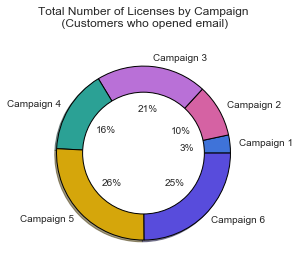

In [49]:
# generate percent of totals
pie_values = (total_licenses_df['total_licenses_with_opens'] / total_licenses_with_opens)

# normalize the campaign labels
labels = [label.replace('_', ' ').title() for label in total_licenses_df['email_campaign'].values]

# list of colors
colors = ['#3F73D9', '#D562A3', '#B970D7', '#2BA195', '#D5A60B', '#584cdcff'] 

# create inner circle object to make donut chart
inner_circle = plt.Circle((0,0), 0.7, facecolor='white', edgecolor='black')

# create object to get current figure
p = plt.gcf()

# add inner circle to figure object
p.gca().add_artist(inner_circle)

# plot values as a pie chart
plt.pie(
    pie_values,
    labels=labels,
    colors=colors,
    wedgeprops={'edgecolor':'black'},
    shadow=True,
    autopct='%1.0f%%', 
    pctdistance=.5
)

plt.title('Total Number of Licenses by Campaign\n (Customers who opened email)\n')

plt.show()

In [50]:
total_licenses_with_opens

2295.0

<a href='#top'>Back to top</a>

<hr>

<a id='metrics'></a>

<h3>Other performance metrics</h3>

I was interested in looking at other performance metrics along the way to understand how well our campaigns did against each other.

These metrics include:

- <b>Open rate</b> : (number of opens / number of sends)
- <b>Click rate</b> : (number of clicks / number of opens)
- <b>Conversion rate</b>: (number of conversions / number of opens)

It's interesting to note that the customer could convert without actually having opened or clicked on the welcome email. I take this into consideration for the remainder of the analysis.

In [51]:
# create new summary_df by joining the total_licenses_df and emails dataframe 
# to get total send counts by campaign
summary_df = total_licenses_df.merge(
    emails[emails['action'] == 'send']
    .groupby(['email_campaign'])['action']
    .size()
    .reset_index(name='send_counts')
)

# join open counts by campaign
summary_df = summary_df.merge(
    emails[emails['action'] == 'open']
    .groupby('email_campaign')['action']
    .size()
    .reset_index(name='open_counts')
)

# join click counts by campaign
summary_df = summary_df.merge(
    emails[emails['action'] == 'click']
    .groupby('email_campaign')['action']
    .size()
    .reset_index(name='click_counts')
)

# join conversion counts where customer opened the welcome email
summary_df = summary_df.merge(
    merged_df[(merged_df['updated_path'].str.contains('open')) &
              (merged_df['number_of_licenses_at_conversion'] > 0.0)]
    .groupby('email_campaign')
    .size()
    .reset_index(name='conversion_count_with_opens')
)

# join conversion counts where customer opened the welcome email, but didn't click on it
summary_df = summary_df.merge(
    merged_df[(merged_df['updated_path'].str.contains('open')) &
              ~(merged_df['updated_path'].str.contains('click')) &
              (merged_df['number_of_licenses_at_conversion'] > 0.0)]
    .groupby('email_campaign')
    .size()
    .reset_index(name='conversion_count_with_opens_no_clicks')
)

# join conversion counts where customer opened and clicked on the welcome email
summary_df = summary_df.merge(
    merged_df[(merged_df['updated_path'].str.contains('click')) &
              (merged_df['number_of_licenses_at_conversion'] > 0.0)]
    .groupby('email_campaign')
    .size()
    .reset_index(name='conversion_count_with_opens_and_clicks')
)

# join conversion counts where customer didn't open the welcome email
summary_df = summary_df.merge(
    merged_df[~(merged_df['updated_path'].str.contains('open')) & 
              (merged_df['number_of_licenses_at_conversion'] > 0.0)]
    .groupby('email_campaign')
    .size()
    .reset_index(name='conversion_count_no_opens')
)

# join total conversion counts by campaign
summary_df = summary_df.merge(
    conversions.merge(
        emails[emails['action'] == 'send']
    )
    .groupby('email_campaign')
    .size()
    .reset_index(name='conversion_count_total')
)

# set the table's index to the email campaign
summary_df = summary_df.set_index('email_campaign')

# add a total row
summary_df.loc['Total'] = summary_df.sum()

# add send rate
summary_df['send_rate'] = 1.0

# calculate open rate
summary_df['open_rate'] = summary_df['open_counts'] / summary_df['send_counts']

# calculate click rate
summary_df['click_rate'] = summary_df['click_counts'] / summary_df['open_counts']

# calculate conversion rate (customers who opened the welcome email)
summary_df['conversion_rate_all_opens'] = summary_df['conversion_count_with_opens'] / summary_df['open_counts']

# customers who opened the email but didn't click AND converted over the total number of people who opened the email
summary_df['conversion_rate_open_no_click'] = (summary_df['conversion_count_with_opens_no_clicks'] / 
                                               summary_df['open_counts'])

# calculate conversion rate (customers who clicked on a link in welcome email AND converted)
summary_df['conversion_rate_open_and_click'] = (summary_df['conversion_count_with_opens_and_clicks'] / 
                                                summary_df['open_counts'])

# calculate conversion rate (customers who didn't open the welcome email, but converted anyway)
summary_df['conversion_rate_send_only'] = summary_df['conversion_count_no_opens'] / (
    summary_df['send_counts'] - summary_df['open_counts'])

# calculate conversion rate (converted over total sends)
summary_df['conversion_rate_total'] = summary_df['conversion_count_total'] / summary_df['send_counts']

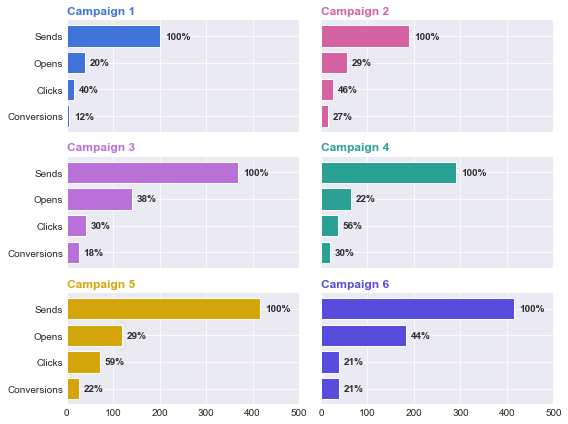

In [52]:
# create y labels
y_labels = ['Sends', 'Opens', 'Clicks', 'Conversions']

# set y_ticks
y_ticks = [i for i, _ in enumerate(y_labels)]

# columns for funnel analysis
funnel_cols = ['send_counts', 'open_counts', 'click_counts', 'conversion_count_with_opens']

# create a matplotlib figure object
fig = plt.figure(figsize=(8, 6))

for idx, campaign in enumerate(campaigns):
    
    ax = fig.add_subplot(3, 2, idx + 1)                         # add new subplot
    ax.barh(
            y_ticks,                                            # set y_ticks
            summary_df.loc[campaign, funnel_cols].values,       # plot values
            color=colors[idx],                                  # apply color based on campaign
            edgecolor='white'                                   # set edgecolor to white
        )
    
    # make sure all graphs have the same x-axis
    ax.set_xlim(0, 500)
    
    # set y ticks
    ax.set_yticks(y_ticks)
    
    # remove left and bottom ticks
    ax.tick_params(left=False, bottom=False)
    
    # remove x and y label for certain subplots
    if idx in [0,2,4]:
        ax.set_yticklabels(y_labels)
    else:
        ax.set_yticklabels([])
    if idx in range(4):
        ax.set_xticklabels([])
        
    # set the title
    ax.set_title('{}'.format(campaign.replace('_', ' ').title()), 
                 loc='left',
                 color=colors[idx],
                 weight='bold')
    
    # invert the axis
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    text = summary_df.loc[campaign, ['send_rate', 'open_rate', 'click_rate', 'conversion_rate_all_opens']].values.tolist()
    
    # plot the conversion percentages, beginning at 100.0% for sends
    for idx, val in enumerate(text):
        ax.text(val + summary_df.loc[campaign, funnel_cols].values[idx] + 10, 
                idx + .1, 
                str('{:.0%}'.format(val)), 
                color = 'black',
                alpha = .8,
                weight = 'bold')

<b>Please note</b>: Conversions in this graph only take into consideration the customers who actually opened the welcome email and eventually converted. Therefore, in this scenario, conversion rate is calculated as number of converted customers over the number of customers who opened the email. Clicking on a link in the email isn't necessary to convert. I'm assuming that the customer can go to the company's website directly and finish the conversion there without engaging with the email.

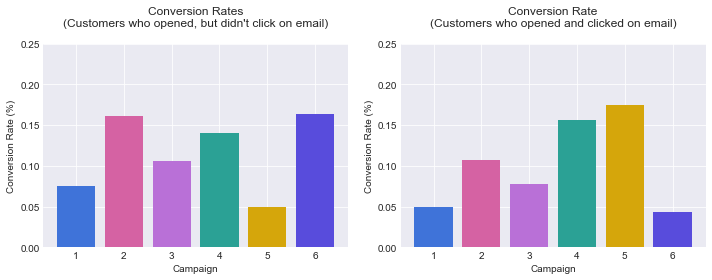

In [53]:
fig = plt.figure(figsize=(10,4))
x_ticks = [i for i, _ in enumerate(campaigns)]
cols = ['conversion_rate_open_no_click', 'conversion_rate_open_and_click']
titles = ['Conversion Rates\n(Customers who opened, but didn\'t click on email)\n', 
          'Conversion Rate\n(Customers who opened and clicked on email)\n']

for i in range(2):
    ax = fig.add_subplot(1,2,i + 1)
    ax.bar(x_ticks, summary_df[cols[i]].values[:-1], color = colors)
    ax.set_ylim(0, .25)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([campaign.split('_')[1] for campaign in campaigns])
    ax.set_xlabel('Campaign')
    ax.set_ylabel('Conversion Rate (%)')
    ax.set_title(titles[i])

plt.tight_layout()

In [54]:
# display summary_df 
summary_df

,total_licenses_with_opens,total_licenses_no_opens,total_licenses,send_counts,open_counts,click_counts,conversion_count_with_opens,conversion_count_with_opens_no_clicks,conversion_count_with_opens_and_clicks,conversion_count_no_opens,conversion_count_total,send_rate,open_rate,click_rate,conversion_rate_all_opens,conversion_rate_open_no_click,conversion_rate_open_and_click,conversion_rate_send_only,conversion_rate_total
email_campaign,,,,,,,,,,,,,,,,,,,
campaign_1,77.0,661.0,738.0,201.0,40.0,16.0,5.0,3.0,2.0,35.0,40.0,1.0,0.199005,0.400000,0.125000,0.075000,0.050000,0.217391,0.199005
campaign_2,225.0,270.0,495.0,190.0,56.0,26.0,15.0,9.0,6.0,17.0,32.0,1.0,0.294737,0.464286,0.267857,0.160714,0.107143,0.126866,0.168421
campaign_3,471.0,648.0,1119.0,368.0,141.0,42.0,26.0,15.0,11.0,35.0,61.0,1.0,0.383152,0.297872,0.184397,0.106383,0.078014,0.154185,0.165761
campaign_4,356.0,946.0,1302.0,290.0,64.0,36.0,19.0,9.0,10.0,50.0,69.0,1.0,0.220690,0.562500,0.296875,0.140625,0.156250,0.221239,0.237931
campaign_5,595.0,1509.0,2104.0,416.0,120.0,71.0,27.0,6.0,21.0,64.0,91.0,1.0,0.288462,0.591667,0.225000,0.050000,0.175000,0.216216,0.218750
campaign_6,571.0,780.0,1351.0,415.0,184.0,38.0,38.0,30.0,8.0,48.0,86.0,1.0,0.443373,0.206522,0.206522,0.163043,0.043478,0.207792,0.207229
Total,2295.0,4814.0,7109.0,1880.0,605.0,229.0,130.0,72.0,58.0,249.0,379.0,1.0,0.321809,0.378512,0.214876,0.119008,0.095868,0.195294,0.201596


<hr>

<a id='summary'></a>

<h3>Summary</h3>

How did the email campaigns perform? It really depends on what metric you're looking at. 

#### Conversion rates with just opens

When looking just at `open rates`, campaign 6 performs the best. A little less than 200 people who were sent emails in said campaign actually opened them. The high open rate makes me wonder what was used as the email subject or who the target audience was. I'm assuming that customers don't have to click on a link in the welcome email and can simply go from `send > open > convert`. For customers who opened the welcome email and converted (without clicking on a link), campaign 4 has the highest conversion rate at roughly 30%, with campaigns 4 and 2 trailing it at 30% and 27%, respectively (check out the funnel graph above). 

#### Conversion rates with clicks

When considering `click rates`, however, campaign 5 ranked highest with a click rate of 59%. If we break this down further and look at the individuals who eventually converted after clicking on a link in the welcome email, campaign 5 has the highest conversion rate for customers who clicked on a link in the email at 17.5% (see the column `conversion_rate_open_and_click` in the table above). If we're assuming that the click attributed to the conversion of the customer, this is the best metric to consider email campaign performance and is the highest for campaign 5, when compared to the other campaigns.

#### Number of licenses

Lastly, assuming that each license a customer has at the time of conversion generates more revenue for the company, customers in campaign 5 have the most number of licenses at the time of their conversion when compared to other customers in other campaigns. Customers in campaign 5 who opened an email AND converted have an average of 22 licenses and make up 26% of total licenses for converted customers who open the welcome email (see pie graph above). 

#### Next steps

Campaign 5 is the best performing campaign given that it had the highest conversion rates where `clicks` exist in the customer journey and the largest number of licenses at the time of their customers' conversions. For campaigns 1 and 3, given their relative poor conversion rate and small cohort size (campaign 1), it might be worthwhile to realign on who the customer segments were and test different taglines in the email subject for future experimentation. Campaign 6 had a high open rate, but low click rate. I would recommend testing different call to actions, design, or copy for similar customer segments as a next step.

<a href='#top'>Back to top</a>